## DS Nanodegree Project: San Francisco Crime Incidents

You can find the description of the dataset <a href='https://www.kaggle.com/c/sf-crime/data'>here</a>


### The analysis for this project will follow the CRISP-DM Process which are ;
+ _Business Understanding_ 
+ _Data Understanding_
+ _Data Preparation_
+ _Modelling_
+ _Evaluation_
+ _Deployment_

### Business Understanding

The following questions will be answered in this project;
+ _What are the most commited crime incidents in Francisco?_
+ _How frequently does crimes occur with respect to time?_
+ _How frequently does crimes occur with respect to location?_

### Data Understanding and Data Preparation

This stage involves followed by preparing the data and `Exploring the data`. The following data preparation steps will be carried out
+ _Checking for duplicates_ 
+ _Checking for Missing Valus_
+ _Treat Categorical features for Modelling_ 

### Modeling 
This stage involes creating a classification model to predict the next next crime in San Fransisco 


###  Deployment
The deployment stage of this project was carried out by Creatinga blogpost on Medium. Click <a href='https://www.kaggle.com/c/sf-crime/data'>here</a> to see the blogpost

#### Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import operator
import random
from PIL import Image
import os as os
from sklearn.preprocessing import LabelEncoder
os.environ['PROJ_LIB'] = 'C:/Users/FOyelami/AppData/Local/Continuum/anaconda3/Library/share'
from mpl_toolkits.basemap import Basemap
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

import plotly.graph_objects as go
import os


#### Data Understanding

In [2]:
sf_data=pd.read_csv('./train.csv')

In [3]:
sf_data.head(10)

Dates        Category                        Descript  \
0  2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
8  2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
9  2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                        Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED      VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE       1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE      100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE            0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE            AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE       KIRKWOOD AV / DONAHUE ST   
8  Wednesday   RICHMOND            NONE           600 Block of 47TH AV   
9  Wednesday    CENTRAL            NONE  JEFFERSON ST / LEAVENWORTH ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541  
5 -122.403252  37.713431  
6 -122.423327  37.725138  
7 -122.371274  37.727564  
8 -122.508194  37.776601  
9 -122.419088  37.807802

In [4]:
#decription of the dataset only two columns are numerical
sf_data.describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [5]:
sf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


### Data Cleaning and Preparation

In [6]:
print('Shape before dropping duplicates', sf_data.shape)
sf_data.drop_duplicates(subset='Dates', keep='last')
print('Shape after dropping duplicates', sf_data.shape)

Shape before dropping duplicates (878049, 9)
Shape after dropping duplicates (878049, 9)


In [7]:
(sf_data.isnull().mean())*100

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

The above steps shows there are no duplicate and missing values in the dataset. We can then proceed to exploring the data

### Question 1: What are the most frequent crime incidents in Francisco?
Here we are going  a look at the target variable, which is the category features, it contains the diffrent category of the crime incident in Francisco

In [8]:
def printCategoriesOccurrence():
    
    categories = sf_data['Category']
    # count the number of occurances for each category
    occurances = Counter(categories)
    sorted_occ = sorted(occurances.items(), key=lambda pair: pair[1], reverse=True)
    for key, value in sorted_occ:
        print (key, value)
    return sorted_occ
        
sorted_occ = printCategoriesOccurrence()

LARCENY/THEFT 174900
OTHER OFFENSES 126182
NON-CRIMINAL 92304
ASSAULT 76876
DRUG/NARCOTIC 53971
VEHICLE THEFT 53781
VANDALISM 44725
WARRANTS 42214
BURGLARY 36755
SUSPICIOUS OCC 31414
MISSING PERSON 25989
ROBBERY 23000
FRAUD 16679
FORGERY/COUNTERFEITING 10609
SECONDARY CODES 9985
WEAPON LAWS 8555
PROSTITUTION 7484
TRESPASS 7326
STOLEN PROPERTY 4540
SEX OFFENSES FORCIBLE 4388
DISORDERLY CONDUCT 4320
DRUNKENNESS 4280
RECOVERED VEHICLE 3138
KIDNAPPING 2341
DRIVING UNDER THE INFLUENCE 2268
RUNAWAY 1946
LIQUOR LAWS 1903
ARSON 1513
LOITERING 1225
EMBEZZLEMENT 1166
SUICIDE 508
FAMILY OFFENSES 491
BAD CHECKS 406
BRIBERY 289
EXTORTION 256
SEX OFFENSES NON FORCIBLE 148
GAMBLING 146
PORNOGRAPHY/OBSCENE MAT 22
TREA 6


In [9]:
#Selected the top category of crime occurence in San Francisco
df_cr=pd.DataFrame(sf_data['Category'].value_counts(normalize=True))
values = list(df_cr['Category'])
labels = df_cr.head(25).index

fig = go.Figure(data=[go.Bar(
            x=labels, y=values,
            text=values,
           textposition='outside',
        )])
fig.update_layout(
    title="Distribution of the topmost Crime incidents in San Francisco",
    xaxis_title="Category of Crimes",
    yaxis_title="Count of Crime Incidents",
    width=900,
    height=700
    )

fig.show()

#### From the chart above it  appears thats the most commited crime in sanfransciso are property crimes  which includes Larceny, Burglary, Vehicle Theft, and vandalism

### Question 2: How frequently does crimes incidents occur with respect to time?

To answer this question we firstly we are going to features that determine when a crime occur such as time of day, day of the week, month of year and Year

In [10]:
#New features Created
sf_data['Dates']=pd.to_datetime(sf_data["Dates"])
sf_data['Year']=sf_data['Dates'].dt.year
sf_data['Month']=sf_data['Dates'].dt.month
sf_data['Hour']=sf_data['Dates'].dt.hour
month_map={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
sf_data['Month'].replace(month_map, inplace=True)
sf_data['Year']=sf_data['Year'].astype(str)
sf_data['Hour']=sf_data['Hour'].astype(str)
sf_data.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year Month Hour  
0 -122.425892  37.774599  2015   May   23  
1 -122.425892  37.774599  2015   May   23  
2 -122.424363  37.800414  2015   May   23  
3 -122.426995  37.800873  2015   May   23  
4 -122.438738  37.771541  2015   May   23

#### Here we are going to look athe the distribution of time by crime incidents

In [11]:
# i created a new dataframe for the new features created
YearlyData = pd.DataFrame(sf_data["Year"].value_counts())
MonthlyData = pd.DataFrame(sf_data["Month"].value_counts())
WeeklyData = pd.DataFrame(sf_data["DayOfWeek"].value_counts(sort=False))
HourlyData = pd.DataFrame(sf_data["Hour"].value_counts())
DistrictData = pd.DataFrame(sf_data["PdDistrict"].value_counts())

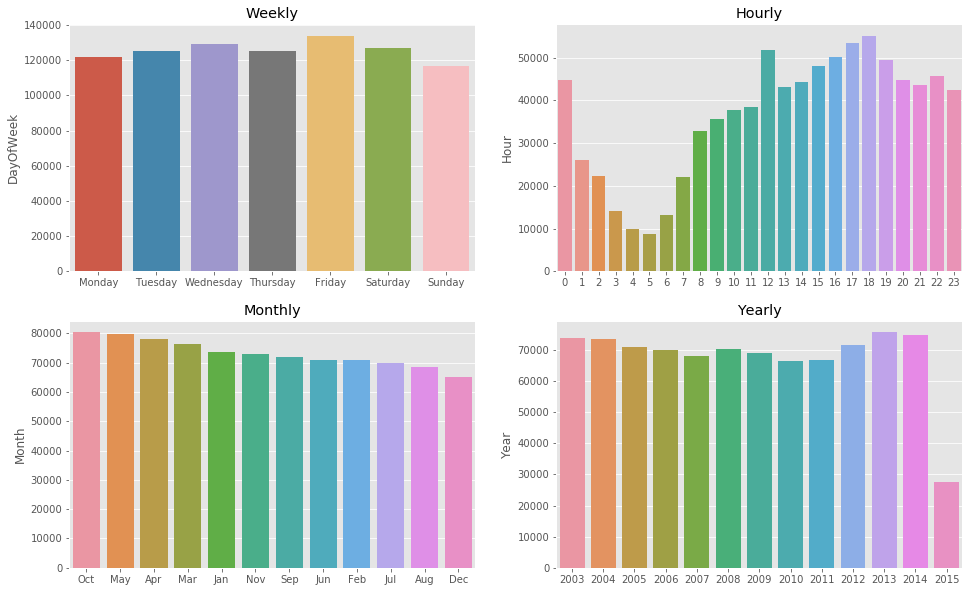

In [12]:
#making plots for each features
plt.figure(figsize=(16,10))
ax1 =  plt.subplot2grid((2,2),(0,0))
ax1.set_title('Weekly')
sns.barplot(x=WeeklyData.index, y="DayOfWeek", data=WeeklyData, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax2 =  plt.subplot2grid((2,2),(0,1))
ax2.set_title('Hourly')
sns.barplot(x=HourlyData.index, y="Hour", data=HourlyData, order=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
ax3 =  plt.subplot2grid((2,2),(1,0))
ax3.set_title('Monthly')
sns.barplot(x=MonthlyData.index, y="Month", data=MonthlyData)
ax4 =  plt.subplot2grid((2,2),(1,1))
ax4.set_title('Yearly')
sns.barplot(x=YearlyData.index, y="Year", data=YearlyData)

#### The above chart illustrate the distribution of Crime incident with respect to Time, below i am going to select the top 10 catgories of crime incidents with each features related to time

In [13]:
#I created a pandas series to select the top ten categories
df_cr=pd.DataFrame(sf_data['Category'].value_counts())
top10cc=pd.Series(df_cr.head(10).index)
top10cc
top10=sf_data[sf_data['Category'].isin(top10cc)]
top10.describe(include='all')

Dates       Category                      Descript  \
count                733122         733122                        733122   
unique               355733             10                           517   
top     2011-01-01 00:01:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
freq                    160         174900                         60022   
first   2003-01-06 00:01:00            NaN                           NaN   
last    2015-05-13 23:53:00            NaN                           NaN   
mean                    NaN            NaN                           NaN   
std                     NaN            NaN                           NaN   
min                     NaN            NaN                           NaN   
25%                     NaN            NaN                           NaN   
50%                     NaN            NaN                           NaN   
75%                     NaN            NaN                           NaN   
max                     NaN            NaN                           NaN   

       DayOfWeek PdDistrict Resolution                 Address              X  \
count     733122     733122     733122                  733122  733122.000000   
unique         7         10         17                   22950            NaN   
top       Friday   SOUTHERN       NONE  800 Block of BRYANT ST            NaN   
freq      111138     134592     456758                   21998            NaN   
first        NaN        NaN        NaN                     NaN            NaN   
last         NaN        NaN        NaN                     NaN            NaN   
mean         NaN        NaN        NaN                     NaN    -122.422616   
std          NaN        NaN        NaN                     NaN       0.030764   
min          NaN        NaN        NaN                     NaN    -122.513642   
25%          NaN        NaN        NaN                     NaN    -122.432915   
50%          NaN        NaN        NaN                     NaN    -122.416407   
75%          NaN        NaN        NaN                     NaN    -122.406970   
max          NaN        NaN        NaN                     NaN    -120.500000   

                    Y    Year   Month    Hour  
count   733122.000000  733122  733122  733122  
unique            NaN      13      12      24  
top               NaN    2014     Oct      18  
freq              NaN   64037   66701   47660  
first             NaN     NaN     NaN     NaN  
last              NaN     NaN     NaN     NaN  
mean        37.771983     NaN     NaN     NaN  
std          0.477031     NaN     NaN     NaN  
min         37.707920     NaN     NaN     NaN  
25%         37.753429     NaN     NaN     NaN  
50%         37.775421     NaN     NaN     NaN  
75%         37.784479     NaN     NaN     NaN  
max         90.000000     NaN     NaN     NaN

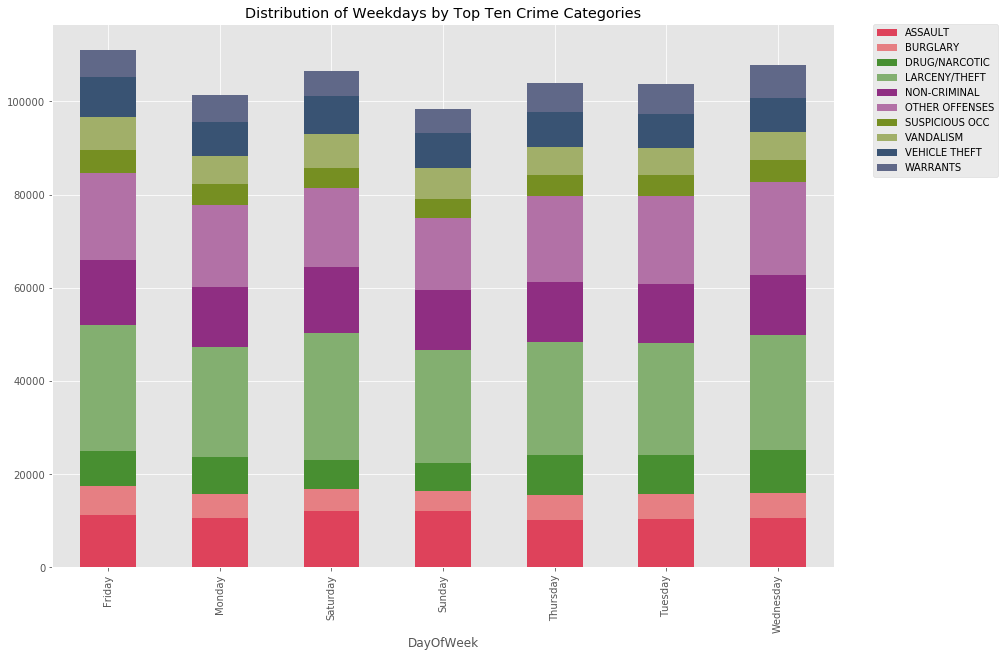

In [14]:
#Created a pivot table to help us illustarte the stacked bar chart
tmp=pd.DataFrame(top10.groupby(['DayOfWeek','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
color_sequence=['#de425b','#e67f83','#488f31','#83af70','#8f2e82','#b271a6','#768f22','#a1af69','#395373','#606888']
tmp=tmp.pivot(index='DayOfWeek',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(14,10))
tmp.plot(ax=axes,kind='bar', stacked=True,colors=color_sequence)
plt.title('Distribution of Weekdays by Top Ten Crime Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

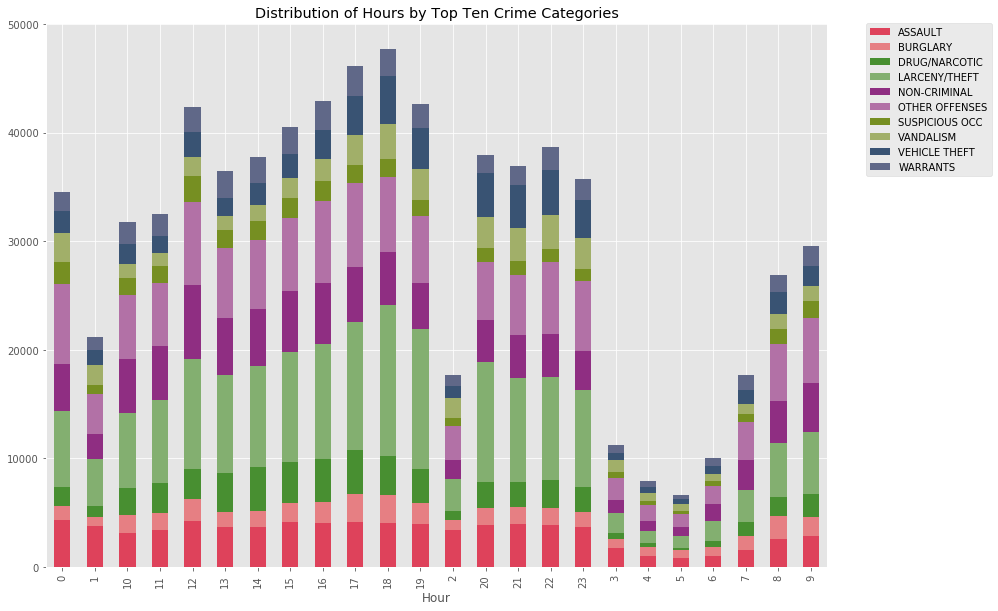

In [15]:
#Created a pivot table to help us illustarte the stacked bar chart
tmp=pd.DataFrame(top10.groupby(['Hour','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
color_sequence=['#de425b','#e67f83','#488f31','#83af70','#8f2e82','#b271a6','#768f22','#a1af69','#395373','#606888']
tmp=tmp.pivot(index='Hour',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(14,10))
tmp.plot(ax=axes,kind='bar', stacked=True,colors=color_sequence)
plt.title('Distribution of Hours by Top Ten Crime Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

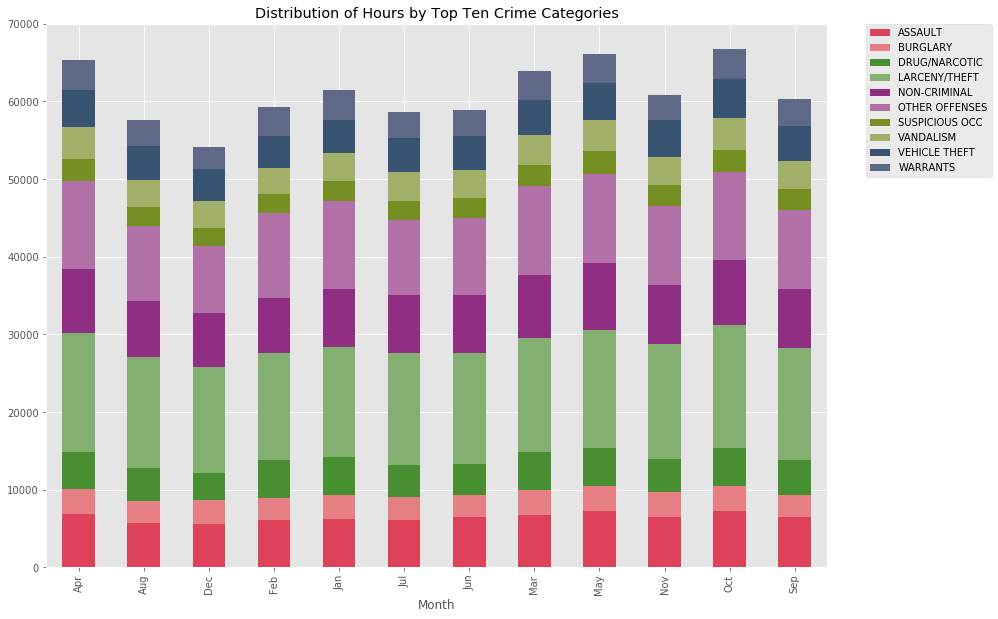

In [16]:
#Created a pivot table to help us illustarte the stacked bar chart
tmp=pd.DataFrame(top10.groupby(['Month','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
color_sequence=['#de425b','#e67f83','#488f31','#83af70','#8f2e82','#b271a6','#768f22','#a1af69','#395373','#606888']
tmp=tmp.pivot(index='Month',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(14,10))
tmp.plot(ax=axes,kind='bar', stacked=True,colors=color_sequence)
plt.title('Distribution of Hours by Top Ten Crime Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

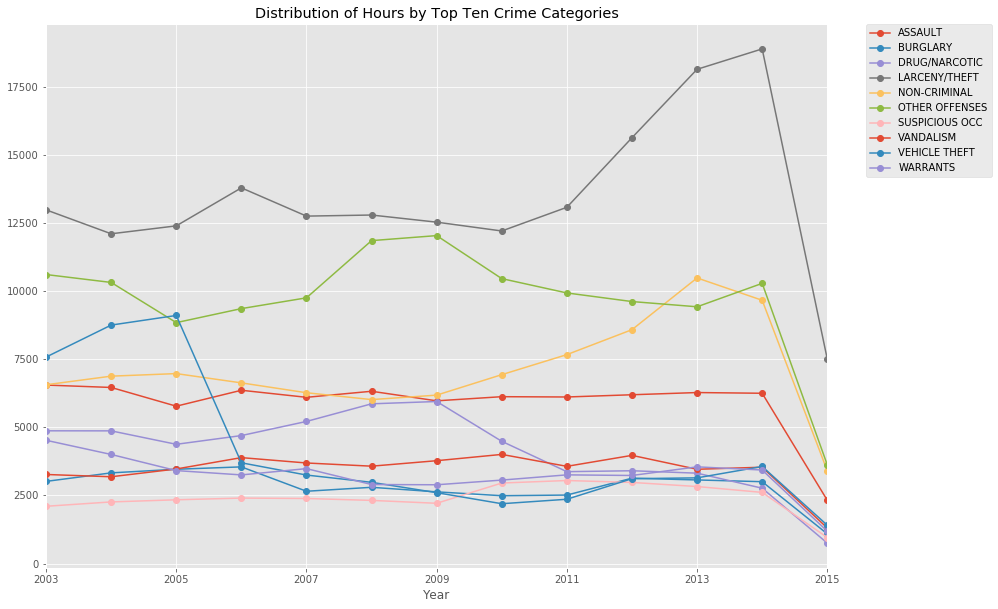

In [17]:
#Created a pivot table to help us illustarte the Line Plot
tmp=pd.DataFrame(top10.groupby(['Year','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
color_sequence=['#de425b','#e67f83','#488f31','#83af70','#8f2e82','#b271a6','#768f22','#a1af69','#395373','#606888']
tmp=tmp.pivot(index='Year',columns='Category',values='count')
tmp.plot(figsize=(14,10),marker='o')
plt.title('Distribution of Hours by Top Ten Crime Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Question 3: How frequently does crimes incidents occur with respect to Location?

In [18]:
sf_data.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year Month Hour  
0 -122.425892  37.774599  2015   May   23  
1 -122.425892  37.774599  2015   May   23  
2 -122.424363  37.800414  2015   May   23  
3 -122.426995  37.800873  2015   May   23  
4 -122.438738  37.771541  2015   May   23

In [19]:
sf_data.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [23]:
df_cr=pd.DataFrame(sf_data['PdDistrict'].value_counts(normalize=True))
values = list(df_cr['PdDistrict'])
labels = df_cr.index

fig = go.Figure(data=[go.Bar(
            x=labels, y=values,
            text=values,
           textposition='outside',
        )])
fig.update_layout(
    title="Distribution of Police Department District in San Francisco",
    xaxis_title="Police Departemnt District",
    yaxis_title="Count of Police Department District",
    width=900,
    height=700
    )

fig.show()

###### Below chart illustarte the crime incident in the city, to acive this i downlaoded the San Francisco Open Tree map text file link is available <a href='https://www.kaggle.com/c/sf-crime/discussion/14632'>here</a>

[7, 3, 4, 0, 1, 9, 2, 8, 5, 6]
['SOUTHERN', 'MISSION', 'NORTHERN', 'BAYVIEW', 'CENTRAL', 'TENDERLOIN', 'INGLESIDE', 'TARAVAL', 'PARK', 'RICHMOND']
7


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


3


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


4


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0
1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


9


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


2


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


8


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


5


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


6


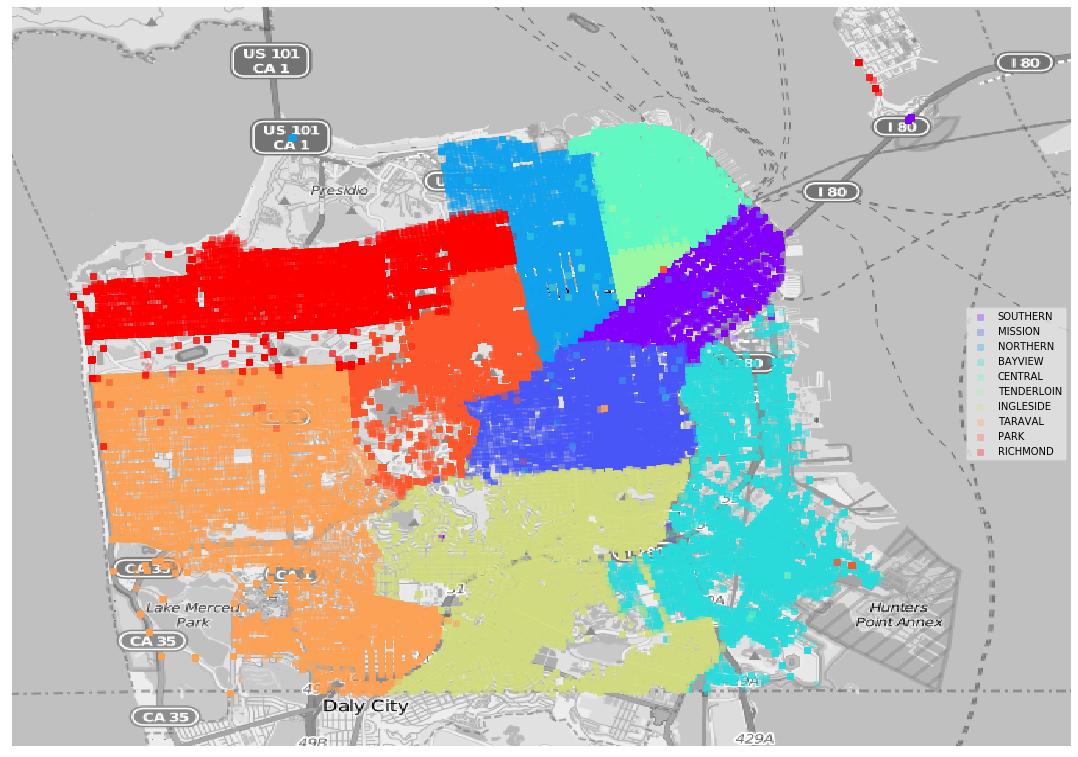

<Figure size 432x288 with 0 Axes>

In [24]:
def mapy_plotter(var):
    

    train_df =pd.read_csv('./train.csv')

    labelenco = LabelEncoder()

    train_df['Catego_num'] = labelenco.fit_transform(train_df.Category)
    train_df['PdDis_num'] = labelenco.fit_transform(train_df.PdDistrict)

    train_df.drop(train_df.columns[[0,2,3,5,6]], axis=1, inplace=True)

   # print(train_df.head())
    
    
    if var == 'Category':
        var_bis = 'Catego_num'
    if var == 'PdDistrict':
        var_bis = 'PdDis_num'

    dic = {}
    for elemnt in train_df[var].unique():
        dic[elemnt] = [len(train_df[var_bis][train_df[var] == elemnt]), train_df[var_bis][train_df[var] == elemnt].unique()[0]]
    

    sorted(dic.items(), key=lambda x:x[1])

    sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
    
    cuentas = []
    nombres = []
    for i in range(0,10):
        cuentas.append(sorted_dic[i][1][1])
        nombres.append(sorted_dic[i][0])
    
    print(cuentas)
    print(nombres)
    
    df = pd.DataFrame(train_df[train_df[var_bis].isin(cuentas)])
    
    color=iter(plt.cm.rainbow(np.linspace(0,1,len(cuentas))))


    plt.figure(figsize=(19,14))

    map = Basemap(projection='cyl',
                  resolution = 'h',
                  llcrnrlon = -122.52469,
                  llcrnrlat = 37.69862, 
                  urcrnrlon = -122.33663, 
                  urcrnrlat = 37.82986, 
                  lat_0=37.752303,
                  lon_0=-122.445576)
    for num in cuentas:
        colo=next(color)
        print(num) 
        aleatorio = random.sample(range(0,len(df[df[var_bis]==num])), 20000)
        nombre = ''.join(train_df[var][train_df[var_bis]==num].unique()) 
        x, y = map(df[df[var_bis]==num].iloc[aleatorio].X, df[df[var_bis]==num].iloc[aleatorio].Y)
        mapa = map.scatter(x, y, marker=',', c=colo, alpha=0.3, label=nombre )
    plt.legend(scatterpoints=1, bbox_to_anchor=(1,0.6))
    
    mapdata = np.loadtxt("./sf_map_copyright_openstreetmap_contributors.txt")
    plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent=[-122.52469, -122.33663, 37.69862, 37.82986])

    
    plt.show()
    if var == 'PdDistrict':
        plt.savefig('map_PdDist.png')

mapy_plotter('PdDistrict')

#### Lets take a look at the distrubution of Street address

In [20]:
def printCategoriesOccurrence():
    
    categories = sf_data['Address']
    # count the number of occurances for each category
    occurances = Counter(categories)
    sorted_occ = sorted(occurances.items(), key=lambda pair: pair[1], reverse=True)
    for key, value in sorted_occ:
        print (key, value)
    return sorted_occ
        
sorted_occ = printCategoriesOccurrence()

800 Block of BRYANT ST 26533
800 Block of MARKET ST 6581
2000 Block of MISSION ST 5097
1000 Block of POTRERO AV 4063
900 Block of MARKET ST 3251
0 Block of TURK ST 3228
0 Block of 6TH ST 2884
300 Block of ELLIS ST 2703
400 Block of ELLIS ST 2590
16TH ST / MISSION ST 2504
1000 Block of MARKET ST 2489
1100 Block of MARKET ST 2319
2000 Block of MARKET ST 2168
100 Block of OFARRELL ST 2140
700 Block of MARKET ST 2081
3200 Block of 20TH AV 2035
100 Block of 6TH ST 1887
500 Block of JOHNFKENNEDY DR 1824
TURK ST / TAYLOR ST 1810
200 Block of TURK ST 1800
0 Block of PHELAN AV 1791
0 Block of UNITEDNATIONS PZ 1789
0 Block of POWELL ST 1717
100 Block of EDDY ST 1681
1400 Block of PHELPS ST 1629
300 Block of EDDY ST 1589
100 Block of GOLDEN GATE AV 1353
100 Block of POWELL ST 1333
200 Block of INTERSTATE80 HY 1316
MISSION ST / 16TH ST 1300
200 Block of EDDY ST 1294
900 Block of POTRERO AV 1290
100 Block of TURK ST 1286
2300 Block of 16TH ST 1281
400 Block of EDDY ST 1246
600 Block of VALENCIA ST 

3RD ST / REVERE AV 203
1700 Block of QUESADA AV 203
1000 Block of PALOU AV 203
HAIGHT ST / FILLMORE ST 203
200 Block of COLUMBUS AV 202
GEARY ST / LEAVENWORTH ST 202
GEARY BL / GOUGH ST 202
0 Block of LOBOS ST 202
200 Block of 2ND ST 202
600 Block of BUSH ST 202
BUSH ST / POLK ST 201
1000 Block of GILMAN AV 201
300 Block of HAIGHT ST 201
2700 Block of 16TH ST 201
1400 Block of POLK ST 200
800 Block of EDDY ST 200
JESSIE ST / 6TH ST 200
1500 Block of CALIFORNIA ST 199
1000 Block of SOUTH VAN NESS AV 199
700 Block of SUTTER ST 199
600 Block of HOWARD ST 199
800 Block of SOUTH VAN NESS AV 199
BAY ST / KEARNY ST 199
4800 Block of 3RD ST 199
400 Block of GENEVA AV 199
1200 Block of NEWHALL ST 199
0 Block of CORTLAND AV 198
700 Block of GOLDEN GATE AV 198
500 Block of LARKIN ST 196
300 Block of GRANT AV 196
300 Block of FULTON ST 196
POLK ST / GEARY ST 196
ELLIS ST / LARKIN ST 196
800 Block of LARKIN ST 196
LARKIN ST / EDDY ST 196
GEARY ST / POLK ST 196
400 Block of 30TH AV 195
200 Block of 

1300 Block of SOUTH VAN NESS AV 110
3300 Block of 26TH ST 110
1400 Block of BAKER ST 110
400 Block of GOLDEN GATE AV 109
OFARRELL ST / MASON ST 109
2900 Block of DIAMOND ST 109
GEARY BL / ARGUELLO BL 109
0 Block of BLUXOME ST 109
200 Block of WEBSTER ST 109
HOWARD ST / 2ND ST 109
1600 Block of GEARY BL 109
100 Block of GARDENSIDE DR 109
5300 Block of 3RD ST 109
HARRISON ST / 7TH ST 109
1700 Block of POLK ST 109
300 Block of GUERRERO ST 109
1500 Block of NEWHALL ST 109
MISSION ST / CORTLAND AV 109
2300 Block of FILLMORE ST 108
1100 Block of LAGUNA ST 108
2ND ST / HOWARD ST 108
1700 Block of FOLSOM ST 108
3600 Block of MISSION ST 108
3RD ST / TOWNSEND ST 108
1600 Block of PINE ST 108
OFARRELL ST / STOCKTON ST 108
400 Block of SERRANO DR 108
3RD ST / JERROLD AV 108
FILLMORE ST / HAIGHT ST 108
FOLSOM ST / 19TH ST 108
SOUTH VAN NESS AV / 18TH ST 108
1400 Block of UNDERWOOD AV 108
1000 Block of CAPP ST 108
18TH ST / VALENCIA ST 107
200 Block of BERRY ST 107
GOLDEN GATE AV / MARKET ST 107
900

1900 Block of PALOU AV 79
POLK ST / FERN ST 79
100 Block of BRIGHT ST 79
SOUTH VAN NESS AV / 21ST ST 79
100 Block of OCEAN AV 79
MISSION ST / PRECITA AV 79
2100 Block of SACRAMENTO ST 79
OAKDALE AV / PHELPS ST 79
300 Block of CLEMENT ST 79
2100 Block of WEBSTER ST 79
1500 Block of HUDSON AV 79
0 Block of JENNINGS ST 79
EDDY ST / DIVISADERO ST 78
200 Block of BATTERY ST 78
100 Block of OAK ST 78
BOSWORTH ST / DIAMOND ST 78
1800 Block of LOMBARD ST 78
THE EMBARCADEROSOUTH ST / BRYANT ST 78
2300 Block of VANNESS AV 78
TURK ST / POLK ST 78
COLUMBUS AV / STOCKTON ST 78
1100 Block of CONNECTICUT ST 78
600 Block of GRANT AV 78
700 Block of MOSCOW ST 78
1100 Block of GEARY BL 78
0 Block of BROAD ST 78
200 Block of NAPOLEON ST 78
200 Block of BRIGHTON AV 78
1700 Block of THE EMBARCADERONORTH ST 78
800 Block of CORBETT AV 78
500 Block of 7TH ST 78
700 Block of SHOTWELL ST 78
100 Block of DUBOCE AV 78
2300 Block of SACRAMENTO ST 78
HAIGHT ST / CENTRAL AV 78
400 Block of OAK ST 78
0 Block of LEE A

300 Block of MCALLISTER ST 65
HARRISON ST / 2ND ST 65
1500 Block of MCKINNON AV 65
100 Block of CAINE AV 65
300 Block of 12TH ST 65
FOLSOM ST / 10TH ST 65
STILLMAN ST / 3RD ST 65
100 Block of PARNASSUS AV 65
200 Block of CASHMERE ST 65
5THSTNORTH ST / MARKET ST 65
LAKE MERCED BL / FONT BL 65
POLK ST / BROADWAY ST 65
300 Block of LONDON ST 65
2500 Block of POWELL ST 65
MARKET ST / NOE ST 65
100 Block of GIRARD ST 65
OCEAN AV / LEE AV 65
2600 Block of JONES ST 65
STOCKTON ST / VALLEJO ST 65
GOLDEN GATE AV / LAGUNA ST 65
SOUTH VAN NESS AV / 24TH ST 65
17TH ST / BRYANT ST 65
1600 Block of PACIFIC AV 65
200 Block of JACKSON ST 65
500 Block of VERMONT ST 65
1800 Block of 19TH AV 65
500 Block of BAY SHORE BL 65
1400 Block of HYDE ST 65
HARRISON ST / 14TH ST 65
OAK ST / WEBSTER ST 65
1100 Block of FULTON ST 65
300 Block of 8TH AV 65
0 Block of RANDOLPH ST 65
2400 Block of SUTTER ST 65
900 Block of CLAY ST 65
100 Block of LOBOS ST 65
0 Block of 30TH ST 65
100 Block of TRUMBULL ST 65
3100 Block 

600 Block of BUCHANAN ST 51
1500 Block of VAN NESS AV 51
600 Block of JOHN MUIR DR 51
BRYANT ST / 6TH ST 50
0 Block of TIOGA AV 50
GEARY BL / 22ND AV 50
2700 Block of LOMBARD ST 50
500 Block of POLK ST 50
OAK ST / ASHBURY ST 50
2000 Block of QUESADA AV 50
3RD ST / CESAR CHAVEZ ST 50
200 Block of BROOKDALE AV 50
0 Block of FUENTE AV 50
700 Block of CORBETT AV 50
2400 Block of GREENWICH ST 50
POST ST / KEARNY ST 50
300 Block of HARRISON ST 50
CALIFORNIA ST / FRANKLIN ST 50
300 Block of WINDING WY 50
600 Block of GOUGH ST 50
500 Block of SCOTT ST 50
500 Block of FRANKLIN ST 50
BAY ST / POLK ST 50
5TH ST / TOWNSEND ST 50
100 Block of HARVARD ST 50
SUTTER ST / LEAVENWORTH ST 50
200 Block of MISSION ST 50
100 Block of GAVEN ST 50
300 Block of BRIGHT ST 50
700 Block of BATTERY ST 50
1000 Block of CHESTNUT ST 50
300 Block of ARBOR ST 50
1100 Block of LOMBARD ST 50
0 Block of HALLAM ST 50
1000 Block of UNION ST 50
600 Block of COMMERCIAL ST 50
1500 Block of WALLACE AV 50
200 Block of JOOST AV 5

1700 Block of PIERCE ST 44
400 Block of CAPITOL AV 44
VANNESS AV / JACKSON ST 44
MISSION ST / HIGHLAND AV 44
2400 Block of TARAVAL ST 44
LOMBARD ST / LARKIN ST 44
0 Block of OAK ST 44
1300 Block of BUCHANAN ST 44
1200 Block of CHURCH ST 44
QUESADA AV / INGALLS ST 44
0 Block of DIAZ AV 44
300 Block of FRANKLIN ST 44
25TH ST / DEHARO ST 44
400 Block of HARRISON ST 44
DIVISION ST / 9TH ST 44
900 Block of POWELL ST 44
RANDOLPH ST / ARCH ST 44
ALABAMA ST / 24TH ST 44
0 Block of MIRAMAR AV 44
400 Block of GREEN ST 43
1200 Block of UTAH ST 43
GROVE ST / GOUGH ST 43
1200 Block of SAN BRUNO AV 43
3300 Block of CLAY ST 43
800 Block of BRODERICK ST 43
600 Block of ARKANSAS ST 43
900 Block of NATOMA ST 43
1500 Block of TARAVAL ST 43
FULTON ST / FILLMORE ST 43
700 Block of 9TH AV 43
MISSION ST / STEUART ST 43
MCALLISTER ST / DIVISADERO ST 43
0 Block of ELSIE ST 43
TAYLOR ST / NORTHPOINT ST 43
2400 Block of 46TH AV 43
22ND ST / FOLSOM ST 43
4300 Block of 17TH ST 43
1400 Block of 8TH AV 43
4500 Block

700 Block of ELLSWORTH ST 37
300 Block of CORTLAND AV 37
200 Block of ELLSWORTH ST 37
600 Block of MADRID ST 37
400 Block of BALBOA ST 37
0 Block of MARGARET AV 37
600 Block of DE HARO ST 37
SUTTER ST / WEBSTER ST 36
100 Block of GREEN ST 36
200 Block of NEVADA ST 36
0 Block of SENECA AV 36
3000 Block of CLEMENT ST 36
0 Block of LEESE ST 36
0 Block of MONTANA ST 36
400 Block of SUNRISE WY 36
2200 Block of LARKIN ST 36
MARKET ST / FRONT ST 36
14TH ST / JULIAN AV 36
1900 Block of 19TH AV 36
500 Block of 44TH AV 36
100 Block of COLE ST 36
400 Block of CONNECTICUT ST 36
34TH AV / CLEMENT ST 36
800 Block of CHURCH ST 36
300 Block of FONT BL 36
1200 Block of GREEN ST 36
2300 Block of VALLEJO ST 36
SILVER AV / CAMBRIDGE ST 36
300 Block of 20TH ST 36
32ND AV / TARAVAL ST 36
2400 Block of 15TH AV 36
STANYAN ST / FULTON ST 36
POST ST / MASON ST 36
100 Block of TEDDY AV 36
2300 Block of WEBSTER ST 36
100 Block of MARTIN LUTHER KING JR DR 36
JONES ST / PINE ST 36
400 Block of FAXON AV 36
0 Block o

400 Block of 3RD AV 33
700 Block of 27TH ST 33
1600 Block of GRANT AV 33
1600 Block of BAY ST 33
17TH AV / TARAVAL ST 33
1500 Block of 17TH AV 33
7000 Block of CALIFORNIA ST 33
1000 Block of FILBERT ST 33
100 Block of SCOTIA AV 33
2300 Block of 15TH ST 33
BELVEDERE ST / HAIGHT ST 33
SCOTT ST / HAIGHT ST 33
COLUMBUS AV / JACKSON ST 33
300 Block of HARKNESS AV 33
CHURCH ST / 17TH ST 33
2700 Block of GEARY BL 33
4500 Block of GEARY BL 33
3RD ST / 25TH ST 33
300 Block of DORE ST 33
WIESE ST / 16TH ST 33
1800 Block of HYDE ST 33
2400 Block of NORIEGA ST 33
700 Block of BUCHANAN ST 33
CORTLAND AV / ANDOVER ST 33
700 Block of 11TH AV 33
200 Block of CONNECTICUT ST 33
2300 Block of 22ND AV 33
SANTOS ST / BLYTHDALE AV 33
100 Block of FULTON ST 33
ILLINOIS ST / 20TH ST 32
CALIFORNIA ST / STOCKTON ST 32
0 Block of MAIN ST 32
200 Block of PENNSYLVANIA AV 32
BEACH ST / LARKIN ST 32
TREAT AV / 24TH ST 32
STOCKTON ST / NORTHPOINT ST 32
400 Block of VICTORIA ST 32
EVANS AV / NAPOLEON ST 32
HOWARD ST /

3500 Block of FULTON ST 28
MONTGOMERY ST / CALIFORNIA ST 28
800 Block of CLAYTON ST 28
23RD ST / KANSAS ST 28
1000 Block of LAKE ST 28
800 Block of 39TH AV 28
15TH ST / SAN BRUNO AV 28
500 Block of JEFFERSON ST 28
2600 Block of 15TH AV 28
500 Block of 16TH AV 28
4500 Block of CALIFORNIA ST 28
900 Block of MOSCOW ST 28
FREMONT ST / MISSION ST 28
JONES ST / JEFFERSON ST 28
200 Block of NAPLES ST 28
3300 Block of BALBOA ST 28
300 Block of ARLINGTON ST 28
300 Block of FRANCONIA ST 28
2500 Block of BROADWAY ST 28
300 Block of SOMERSET ST 28
JONES ST / BUSH ST 28
TRUMBULL ST / MISSION ST 28
OSAGE ST / 24TH ST 28
400 Block of ELLSWORTH ST 28
100 Block of BANKS ST 28
BUSH ST / WEBSTER ST 28
LANE ST / REVERE AV 28
0 Block of POINTLOBOS AV 28
800 Block of 26TH AV 28
200 Block of ROSE ST 28
HAIGHT ST / BRODERICK ST 28
BRYANT ST / 20TH ST 28
1800 Block of 21ST AV 28
FILLMORE ST / FILBERT ST 28
100 Block of RANDALL ST 28
100 Block of ARKANSAS ST 28
POWELL ST / BUSH ST 28
PINE ST / LAGUNA ST 28
CESA

3200 Block of JACKSON ST 26
1000 Block of NOE ST 26
COLUMBUS AV / GRANT AV 26
PAUL AV / SAN BRUNO AV 26
TARAVAL ST / 18TH AV 26
300 Block of MUNICH ST 26
2400 Block of 32ND AV 26
0 Block of PIERCE ST 26
800 Block of FRANCISCO ST 26
15TH ST / MINNA ST 26
700 Block of BUENAVISTAWEST AV 26
LARKIN ST / SACRAMENTO ST 26
3800 Block of CESAR CHAVEZ ST 26
600 Block of 11TH AV 26
3900 Block of CALIFORNIA ST 26
400 Block of 27TH ST 26
0 Block of ROTTECK ST 26
900 Block of DELANO AV 26
0 Block of DELANO AV 26
4500 Block of ANZA ST 26
3100 Block of ALEMANY BL 26
1500 Block of BAKER ST 26
0 Block of MORSE ST 26
MONTGOMERY ST / JACKSON ST 26
100 Block of 7TH AV 26
CLAY ST / POWELL ST 26
7600 Block of GEARY BL 26
POTRERO AV / 15TH ST 26
0 Block of NORTHPOINT ST 26
OCTAVIA ST / PAGE ST 26
0 Block of MOUNT VERNON AV 26
PIERCE ST / TURK ST 26
FULTON ST / 30TH AV 26
DORE ST / BRYANT ST 26
BAY SHORE BL / FLOWER ST 26
CALIFORNIA ST / LAUREL ST 26
CONNECTICUT ST / WISCONSIN ST 26
GUERRERO ST / 19TH ST 26
10

2300 Block of 25TH ST 23
300 Block of PAUL AV 23
500 Block of VISITACION AV 23
200 Block of BRADFORD ST 23
LECONTE AV / 3RD ST 23
500 Block of FLOOD AV 23
1800 Block of 39TH AV 23
400 Block of GRAFTON AV 23
3800 Block of 21ST ST 23
21ST ST / YORK ST 23
FELL ST / SHRADER ST 23
VANDYKE AV / 3RD ST 23
100 Block of STRATFORD DR 23
PHELPS ST / FAIRFAX AV 23
100 Block of BROADWAY ST 23
NORTHRIDGE RD / HARBOR RD 23
1900 Block of 43RD AV 23
PIERCE ST / MCALLISTER ST 23
2500 Block of 16TH ST 23
100 Block of OSAGE ST 23
2300 Block of 18TH AV 23
2200 Block of 43RD AV 23
700 Block of 43RD AV 23
1900 Block of OFARRELL ST 23
0 Block of JOSIAH AV 23
LAGUNA ST / FULTON ST 23
300 Block of NEY ST 23
3900 Block of IRVING ST 23
AMAZON AV / MISSION ST 23
300 Block of PRESIDIO AV 23
2400 Block of 43RD AV 23
BROADWAY ST / OCTAVIA ST 23
23RD ST / YORK ST 23
1100 Block of WASHINGTON ST 23
1400 Block of TARAVAL ST 23
900 Block of VIENNA ST 23
500 Block of ORIZABA AV 23
0 Block of ACEVEDO AV 23
0 Block of YOUNG 

200 Block of SURREY ST 20
0 Block of 21ST AV 20
FOLSOM ST / MOSS ST 20
3600 Block of 25TH ST 20
100 Block of ROLPH ST 20
500 Block of HAMILTON ST 20
WALLER ST / DIVISADERO ST 20
TAYLOR ST / BAY ST 20
100 Block of WAWONA ST 20
FELL ST / SCOTT ST 20
0 Block of CAIRE TR 20
0 Block of RODGERS ST 20
800 Block of RUSSIA AV 20
20TH ST / SANCARLOS ST 20
0 Block of RUTH ST 20
100 Block of TOPAZ WY 20
NAPLES ST / RUSSIA AV 20
500 Block of BRIGHT ST 20
ARMSTRONG AV / 3RD ST 20
COLE ST / PARNASSUS AV 20
JACKSON ST / SCOTT ST 20
0 Block of MERCEDES WY 20
WEBSTER ST / CALIFORNIA ST 20
HARRIET ST / AHERN WY 20
200 Block of TALBERT ST 20
0 Block of WASHINGTON ST 20
CAMERON WY / FITZGERALD AV 20
1000 Block of JONES ST 20
FOLSOM ST / RUSS ST 20
1600 Block of 21ST AV 20
LAGUNA ST / CHESTNUT ST 20
VELASCO AV / SANTOS ST 20
2600 Block of 18TH AV 20
PIERCE ST / ELLIS ST 20
WEBSTER ST / VALLEJO ST 20
LA PLAYA ST / CABRILLO ST 20
2000 Block of 14TH AV 20
3100 Block of FRANKLIN ST 20
IVY ST / LAGUNA ST 20
0 Bl

900 Block of SAN JOSE AV 19
HERON ST / 8TH ST 19
0 Block of HAHN ST 19
100 Block of VALMAR TR 19
300 Block of SANMIGUEL ST 19
1300 Block of 28TH AV 19
1600 Block of DIAMOND ST 19
2600 Block of 44TH AV 19
0 Block of CERRITOS AV 19
FILBERT ST / GOUGH ST 19
BARTLETT ST / CESAR CHAVEZ ST 19
2400 Block of 36TH AV 19
0 Block of ALMADEN CT 19
1100 Block of MARIPOSA ST 19
600 Block of ANDERSON ST 19
0 Block of WAWONA ST 19
1200 Block of 32ND AV 19
NORTHPOINT ST / THE EMBARCADERONORTH ST 19
100 Block of JUANITA WY 19
SANCHEZ ST / DUBOCE AV 19
4000 Block of LINCOLN WY 19
1500 Block of LANE ST 19
100 Block of 14TH AV 19
ALEMANY BL / FOLSOM ST 19
600 Block of 42ND AV 19
200 Block of DELONG ST 19
PINE ST / SANSOME ST 19
WASHINGTON ST / JONES ST 19
INGERSON AV / 3RD ST 19
2600 Block of BALBOA ST 19
600 Block of VISITACION AV 19
700 Block of PRESIDIO AV 19
26TH AV / GEARY BL 19
600 Block of PLYMOUTH AV 19
TEHAMA ST / 1ST ST 19
1500 Block of JUDAH ST 19
2000 Block of 45TH AV 19
WOOLSEY ST / SAN BRUNO 

4TH ST / MINNA ST 17
JACKSON ST / BATTERY ST 17
300 Block of SUNNYDALE AV 17
0 Block of PEABODY ST 17
PAGE ST / FRANKLIN ST 17
500 Block of EDNA ST 17
800 Block of LAKE MERCED BL 17
600 Block of CORTLAND AV 17
500 Block of EUREKA ST 17
MENDELL ST / EVANS AV 17
16TH ST / ALABAMA ST 17
1400 Block of LINCOLN WY 17
SAN JOSE AV / SAGAMORE ST 17
MISSOURI ST / WATCHMAN WY 17
STEUART ST / MARKET ST 17
100 Block of URBANO DR 17
MARINA BL / FILLMORE ST 17
3500 Block of SANTIAGO ST 17
PACIFIC AV / BATTERY ST 17
100 Block of HICKORY ST 17
GREEN ST / FRANKLIN ST 17
LYON ST / JACKSON ST 17
1200 Block of MENDELL ST 17
1200 Block of LASALLE AV 17
2100 Block of THOMAS AV 17
800 Block of EDINBURGH ST 17
CALEDONIA ST / 15TH ST 17
BATTERY ST / THE EMBARCADERONORTH ST 17
VALLEJO ST / POWELL ST 17
200 Block of WARREN DR 17
DEHARO ST / 16TH ST 17
SILVER AV / MERRILL ST 17
0 Block of SANTAPAULA AV 17
BROADWAY ST / FRANKLIN ST 17
1300 Block of PORTOLA DR 17
TURK ST / BRODERICK ST 17
800 Block of MADRID ST 17
0

3600 Block of FOLSOM ST 15
400 Block of LAGRANDE AV 15
CALIFORNIA ST / 25TH AV 15
1400 Block of 33RD AV 15
INGERSON AV / HAWES ST 15
0 Block of HAYES ST 15
LINCOLN WY / 16TH AV 15
KANSAS ST / MARIPOSA ST 15
4100 Block of FULTON ST 15
600 Block of ITALY AV 15
0 Block of MIRALOMA DR 15
2200 Block of OCEAN AV 15
BAKER ST / POST ST 15
PERSIA AV / EDINBURGH ST 15
1600 Block of SCOTT ST 15
INGALLS ST / BANCROFT AV 15
300 Block of CABRILLO ST 15
LYON ST / HAYES ST 15
HUDSON AV / ARDATH CT 15
2700 Block of TURK ST 15
BUSH ST / SCOTT ST 15
300 Block of CHESTER AV 15
0 Block of MALLORCA WY 15
3300 Block of OCTAVIA ST 15
1500 Block of EVANS AV 15
2100 Block of 41ST AV 15
0 Block of JOHN ST 15
1400 Block of LANE ST 15
800 Block of RANDOLPH ST 15
300 Block of MAGELLAN AV 15
1ST ST / NATOMA ST 15
1400 Block of PLYMOUTH AV 15
1500 Block of SCOTT ST 15
30TH AV / JOHNFKENNEDY DR 15
5500 Block of DIAMONDHEIGHTS BL 15
400 Block of STAPLES AV 15
MISSION ST / BROOK ST 15
25TH ST / HAMPSHIRE ST 15
16TH ST /

400 Block of BRUSSELS ST 14
2500 Block of 27TH AV 14
22ND ST / NOE ST 14
GREENWICH ST / POLK ST 14
1700 Block of JERROLD AV 14
300 Block of QUINT ST 14
2500 Block of DIAMOND ST 14
BALBOA ST / 30TH AV 14
2100 Block of JERROLD AV 14
1000 Block of BALBOA ST 14
BUCHANAN ST / HERMANN ST 14
100 Block of WILDE AV 14
PACIFIC AV / GOUGH ST 14
22ND AV / SANTIAGO ST 14
BRYANT ST / CESAR CHAVEZ ST 14
REVERE AV / SILVER AV 14
1200 Block of MISSOURI ST 14
1200 Block of EVANS AV 14
HAIGHT ST / MARKET ST 14
FOLSOM ST / HARRIET ST 14
FRANKLIN ST / GREEN ST 14
17TH ST / ALBION ST 14
0 Block of OSAGE ST 14
800 Block of NAPLES ST 14
PLYMOUTH AV / MINERVA ST 14
BRYANT ST / 18TH ST 14
2500 Block of FULTON ST 14
LAKEVIEW AV / CAINE AV 14
INNES AV / PHELPS ST 14
SLOAT BL / 34TH AV 14
DOLORES ST / 22ND ST 14
600 Block of CHINABASIN ST 14
1300 Block of 6TH ST 14
OSAGE ST / 25TH ST 14
VAN NESS AV / FELL ST 14
MC KINNON AV / SELBY ST 14
100 Block of SAN CARLOS ST 14
0 Block of DE LONG ST 14
1200 Block of DE HARO 

0 Block of GATES ST 12
ELLIS ST / HOLLIS ST 12
48TH AV / FULTON ST 12
0 Block of DAWNVIEW WY 12
3900 Block of BALBOA ST 12
JUDAH ST / 25TH AV 12
200 Block of BAYVIEW CR 12
9TH AV / CABRILLO ST 12
SACRAMENTO ST / SCOTT ST 12
100 Block of ARGUELLO BL 12
1100 Block of VICENTE ST 12
SILVER AV / GOETTINGEN ST 12
700 Block of VISITACION AV 12
1000 Block of BRODERICK ST 12
0 Block of ALDER ST 12
CLEMENTINA ST / 8TH ST 12
1900 Block of JUDAH ST 12
CASHMERE ST / DEDMAN CT 12
300 Block of ULLOA ST 12
900 Block of 7TH ST 12
TOWNSEND ST / 8TH ST 12
BRYANT ST / 1ST ST 12
MARIPOSA ST / TENNESSEE ST 12
1000 Block of VICENTE ST 12
100 Block of RETIRO WY 12
4TH AV / PARNASSUS AV 12
1900 Block of EVANS AV 12
ULLOA ST / 20TH AV 12
200 Block of FERN ST 12
26TH ST / BLAIR TR 12
1100 Block of KIRKHAM ST 12
0 Block of BRUNSWICK ST 12
SELBY ST / QUESADA AV 12
100 Block of QUINT ST 12
0 Block of JUDAH ST 12
700 Block of INGERSON AV 12
200 Block of WALNUT ST 12
DEHARO ST / 18TH ST 12
2200 Block of 24TH AV 12
29

0 Block of CHAVES AV 10
1600 Block of PACHECO ST 10
1500 Block of LYON ST 10
PHELPS ST / DONNER AV 10
LINCOLN WY / 44TH AV 10
100 Block of WILLARDNORTH ST 10
1300 Block of 3RD ST 10
16TH AV / CALIFORNIA ST 10
FRANCISCO ST / OCTAVIA ST 10
23RD ST / DOUGLASS ST 10
MCCOPPIN ST / STEVENSON ST 10
1200 Block of MONTEREY BL 10
DEHARO ST / SOUTHERNHEIGHTS AV 10
3800 Block of WASHINGTON ST 10
2600 Block of MORAGA ST 10
0 Block of COVENTRY CT 10
BERRY ST / 5TH ST 10
LIBERTY ST / CHURCH ST 10
2600 Block of PIERCE ST 10
1000 Block of DIAMOND ST 10
700 Block of ULLOA ST 10
5TH AV / LAKE ST 10
3800 Block of CLEMENT ST 10
1300 Block of 3RD AV 10
HOLLOWAY AV / ASHTON AV 10
BURROWS ST / BRUSSELS ST 10
FILBERT ST / POLK ST 10
MARKET ST / CLAYTON ST 10
CONGDON ST / TRUMBULL ST 10
RUTLAND ST / VISITACION AV 10
0 Block of MARTHA AV 10
CLEMENT ST / 2ND AV 10
2200 Block of STEINER ST 10
LAGUNAHONDA BL / DEWEY BL 10
ASHBURY ST / HAYES ST 10
RAYMOND AV / ELLIOT ST 10
0 Block of DICHIERA CT 10
20TH ST / VERMONT

VANNESS AV / MYRTLE ST 9
4400 Block of LINCOLN WY 9
2500 Block of OCTAVIA ST 9
2400 Block of LAWTON ST 9
LINCOLN WY / 15TH AV 9
LATHROP AV / GILLETTE AV 9
INGERSON AV / INGALLS ST 9
1700 Block of 15TH AV 9
ULLOA ST / 14TH AV 9
MARINA BL / DIVISADERO ST 9
GOUGH ST / GREENWICH ST 9
40TH AV / VICENTE ST 9
CALIFORNIA ST / LYON ST 9
1300 Block of ILLINOIS ST 9
100 Block of COSO AV 9
1500 Block of RIVERA ST 9
PHELPS ST / BANCROFT AV 9
0 Block of CHANCERY LN 9
VALE AV / CRESTLAKE DR 9
1000 Block of BRAZIL AV 9
DUBLIN ST / PERSIA AV 9
0 Block of PIXLEY ST 9
JACKSON ST / BAKER ST 9
BEACH ST / FILLMORE ST 9
100 Block of TWINPEAKS BL 9
3600 Block of BRODERICK ST 9
900 Block of BROTHERHOOD WAY 9
LAWTON ST / 28TH AV 9
BUCHANAN ST / NORTHPOINT ST 9
44TH AV / TARAVAL ST 9
FULTON ST / 45TH AV 9
VALLEJO ST / TAYLOR ST 9
23RD ST / TENNESSEE ST 9
400 Block of SUNNYDALE AV 9
COSO AV / PRECITA AV 9
24TH ST / DEHARO ST 9
LAGUNAHONDA BL / CLARENDON AV 9
0 Block of DOLORES TR 9
200 Block of PERSIA AV 9
100 Bl

1800 Block of CAYUGA AV 9
APTOS AV / OCEAN AV 9
PARIS ST / AVALON AV 9
4400 Block of SHORESFBAY ST 9
200 Block of OSAGE ST 9
BRANNAN ST / DELANCEY ST 9
0 Block of DANIEL BURNHAM CT 9
SAN CARLOS ST / SYCAMORE ST 9
400 Block of FAIR OAKS ST 9
300 Block of LOS PALMOS DR 9
2700 Block of VAN NESS AV 9
200 Block of VAN NESS AV 9
1900 Block of VAN NESS AV 9
1000 Block of RHODE ISLAND ST 9
500 Block of RHODE ISLAND ST 9
200 Block of SAINT CHARLES AV 9
MISSION ST / NEW MONTGOMERY ST 9
LA SALLE AV / 3RD ST 9
1300 Block of DE HARO ST 9
BAY ST / THE EMBARCADERO NORTH ST 9
100 Block of CONSERVATORY DR 9
1600 Block of NORTH POINT ST 9
THE EMBARCADERO SOUTH ST / MARKET ST 9
NEWHALL ST / LA SALLE AV 9
5000 Block of DIAMOND HEIGHTS BL 9
WILLOW ST / VAN NESS AV 9
NEWCOMB AV / LA SALLE AV 9
1600 Block of UNDERWOOD AV 8
0 Block of GENOA PL 8
1400 Block of SELBY ST 8
FULTON ST / 43RD AV 8
3700 Block of CLEMENT ST 8
2200 Block of LINCOLN WY 8
9TH AV / MORAGA ST 8
ULLOA ST / LENOX WY 8
JOHNFKENNEDY DR / KEZA

1400 Block of GREAT HY 8
LAUSSAT ST / WEBSTER ST 8
100 Block of COLON AV 8
900 Block of VALLEJO ST 8
0 Block of MCCORMICK PL 8
LOWELL ST / MORSE ST 8
2200 Block of GOUGH ST 8
CLIPPER ST / CHURCH ST 8
CLAY ST / SPROULE LN 8
WOOLSEY ST / GIRARD ST 8
PACIFIC AV / LYON ST 8
300 Block of CHERRY ST 8
400 Block of BACON ST 8
2000 Block of KEARNY ST 8
BALBOA ST / 32ND AV 8
17TH ST / DOUGLASS ST 8
BUCHANAN ST / GREEN ST 8
OFARRELL ST / PIERCE ST 8
1000 Block of TAYLOR ST 8
16TH ST / HUBBELL ST 8
0 Block of CUSHMAN ST 8
700 Block of DWIGHT ST 8
APPLETON AV / HOLLYPARK CR 8
3800 Block of CABRILLO ST 8
7100 Block of FULTON ST 8
1100 Block of BACON ST 8
800 Block of NIAGARA AV 8
RUSSIA AV / NAPLES ST 8
BELCHER ST / DUBOCE AV 8
OCEAN AV / ONONDAGA AV 8
SACRAMENTO ST / DIVISADERO ST 8
GOUGH ST / FRANCISCO ST 8
FELTON ST / CAMBRIDGE ST 8
OCEAN AV / OTSEGO AV 8
BALBOA ST / 4TH AV 8
20TH ST / SANCHEZ ST 8
GOUGH ST / BROADWAY ST 8
HOLLOWAY AV / DENSLOWE DR 8
1400 Block of FAIRFAX AV 8
CARR ST / SALINAS A

21ST AV / LAKE ST 7
2600 Block of GREEN ST 7
4100 Block of LAWTON ST 7
1000 Block of RIVERA ST 7
400 Block of VISITACION AV 7
TURK ST / ARGUELLO BL 7
8TH AV / LAWTON ST 7
CLIPPER ST / CASTRO ST 7
100 Block of MAGELLAN AV 7
2400 Block of SANTIAGO ST 7
HUGO ST / 7TH AV 7
3500 Block of LAWTON ST 7
DUBOCE AV / DIVISADERO ST 7
NEWHALL ST / FAIRFAX AV 7
31ST AV / BALBOA ST 7
29TH ST / CASTRO ST 7
1200 Block of TWINPEAKS BL 7
3900 Block of CLEMENT ST 7
3800 Block of QUINTARA ST 7
TURK ST / TAMALPAIS TR 7
UNIVERSITY ST / SILVER AV 7
0 Block of PLYMOUTH AV 7
10TH ST / MINNA ST 7
1600 Block of 3RD ST 7
1000 Block of DUNCAN ST 7
5000 Block of ANZA ST 7
2400 Block of VICENTE ST 7
JESSIE ST / 3RD ST 7
500 Block of NORIEGA ST 7
BALBOA ST / 19TH AV 7
2000 Block of ALAMEDA ST 7
BALDWIN CT / OAKDALE AV 7
0 Block of MELBA AV 7
PIERCE ST / OFARRELL ST 7
0 Block of 15TH ST 7
BRAZIL AV / MUNICH ST 7
300 Block of FOERSTER ST 7
REVERE AV / GRIFFITH ST 7
100 Block of PERU AV 7
300 Block of BRENTWOOD AV 7
GEAR

SELBY ST / HUDSON AV 7
300 Block of GOLD MINE DR 7
CYRIL MAGNIN STORTH ST / MARKET ST 7
900 Block of RHODE ISLAND ST 7
3200 Block of VAN NESS AV 7
100 Block of JUAN BAUTISTA CR 7
0 Block of TERRA VISTA AV 7
300 Block of DE HARO ST 7
300 Block of SAN MIGUEL ST 7
FULTON ST / UPPER GREAT HY 7
0 Block of GOLD MINE DR 7
100 Block of SOUTH PARK AV 7
THE EMBARCADERO SOUTH ST / FOLSOM ST 7
0 Block of NORTH POINT ST 7
INGALLS ST / LA SALLE AV 7
2400 Block of UPPER GREAT HY 7
0 Block of BAYSIDE VILLAGE PL 7
THE EMBARCADERO NORTH ST / GREEN ST 7
1000 Block of POINT LOBOS AV 7
0 Block of MT VERNON AV 7
48TH AV / POINT LOBOS AV 7
2100 Block of MC KINNON AV 7
1900 Block of UPPER GREAT HY 7
1000 Block of LE CONTE AV 7
DAVIDSON AV / QUINT ST 7
20TH ST / SAN CARLOS ST 7
MC KINNON AV / LANE ST 7
1200 Block of RHODE ISLAND ST 7
600 Block of RHODE ISLAND ST 7
0 Block of BUENA VISTA EAST AV 7
MC KINNON AV / TOLAND ST 7
26TH ST / DE HARO ST 7
0 Block of HENRY ADAMS ST 7
25TH AV / NORIEGA ST 6
JONES ST / CLA

WEST PORTAL AV / SLOAT BL 6
LARKIN ST / AUSTIN ST 6
PHELPS ST / MC KINNON AV 6
200 Block of GRAND VIEW AV 6
400 Block of JOHN F KENNEDY DR 6
1200 Block of VAN DYKE AV 6
500 Block of LOS PALMOS DR 6
100 Block of ANZA VISTA AV 6
200 Block of JOHN F SHELLEY DR 6
1700 Block of VAN NESS AV 6
LOWER GREAT HY / LINCOLN WY 6
100 Block of DEL MONTE ST 6
LARCH ST / VAN NESS AV 6
VAN NESS AV / FILBERT ST 6
200 Block of TERRY A FRANCOIS BL 6
300 Block of SAN BENITO WY 6
MENDELL ST / MC KINNON AV 6
MC KINNON AV / MENDELL ST 6
300 Block of SOUTH HILL BL 6
900 Block of WALLER ST 6
1400 Block of MC KINNON CT 6
100 Block of DE SOTO ST 6
CHARLES J BRENHAM PLORTH ST / MCALLISTER ST 6
1100 Block of SAN JOSE AV 6
VAN NESS AV / NORTH POINT ST 6
2200 Block of MC KINNON AV 6
NEW MONTGOMERY ST / NATOMA ST 6
CONGO ST / FLOOD AV 6
CLEMENT ST / PARK PRESIDIO BL 6
MARKET ST / CYRIL MAGNIN STORTH ST 6
LOOMIS ST / FLOWER ST 5
1ST ST / STEVENSON ST 5
100 Block of CRESTMONT DR 5
0 Block of MANSFIELD ST 5
JONES ST / FIL

FOERSTER ST / JUDSON AV 5
GEARY BL / 41ST AV 5
2700 Block of 19TH AV 5
0 Block of CARDENAS AV 5
800 Block of EUGENIA AV 5
EDINBURGH ST / FRANCE AV 5
CABRILLO ST / 33RD AV 5
ARGUELLO BL / EUCLID AV 5
DEHARO ST / 22ND ST 5
1600 Block of QUINTARA ST 5
18TH ST / LINDA ST 5
GRAYSTONE TR / CORBETT AV 5
CAROLINA ST / WISCONSIN ST 5
3400 Block of ULLOA ST 5
JACKSON ST / DAVIS CT 5
1300 Block of QUINTARA ST 5
SHANNON ST / POST ST 5
MARKET ST / GLENDALE ST 5
400 Block of PERALTA AV 5
0 Block of ROBINHOOD DR 5
100 Block of DAVIS ST 5
MALLORCA WY / ALHAMBRA ST 5
1200 Block of CARROLL AV 5
MISSISSIPPI ST / 20TH ST 5
BUSH ST / PRESIDIO AV 5
1200 Block of MORAGA ST 5
5TH AV / CORNWALL ST 5
200 Block of AUSTIN ST 5
1300 Block of BALBOA ST 5
0 Block of CAPITOL AV 5
37TH AV / ULLOA ST 5
SACRAMENTO ST / CHERRY ST 5
VICENTE ST / 38TH AV 5
BAKER ST / PINE ST 5
ALEMANY BL / FRANCIS ST 5
200 Block of SICKLES AV 5
3200 Block of QUINTARA ST 5
JUDAH ST / 8TH AV 5
3800 Block of ALEMANY BL 5
BRODERICK ST / JEFFER

IRVING ST / ARGUELLO BL 4
SACRAMENTO ST / LEIDESDORFF ST 4
SAN JOSE AV / DUNCAN ST 4
800 Block of 5TH ST 4
MISSOURI ST / 18TH ST 4
DIAMOND ST / 21ST ST 4
1400 Block of KIRKHAM ST 4
MADISON ST / SILVER AV 4
TURK ST / SEYMOUR ST 4
FLOWER ST / BAY SHORE BL 4
MIDWAY ST / FRANCISCO ST 4
PORTOLA DR / TERESITA BL 4
BELVEDERE ST / GRATTAN ST 4
TUCKER AV / RUTLAND ST 4
ELLIS ST / BEIDEMAN ST 4
GREAT HWY / VICENTE ST 4
200 Block of TWINPEAKS BL 4
2300 Block of WAWONA ST 4
MARTIN LUTHER KING JR DR / METSON RD 4
15TH AV / ANZA ST 4
2100 Block of ULLOA ST 4
32ND AV / ORTEGA ST 4
THORNTON AV / FLORA ST 4
3000 Block of NORIEGA ST 4
TOWNSEND ST / COLINPKELLYJR ST 4
CAMBRIDGE ST / BACON ST 4
ELGINPARK ST / DUBOCE AV 4
STILL ST / DANTON ST 4
2700 Block of SCOTT ST 4
WILLARD ST / PARNASSUS AV 4
1400 Block of ULLOA ST 4
KAPLAN LN / CLEMENTINA ST 4
ANDOVER ST / RICHLAND AV 4
2800 Block of IRVING ST 4
3300 Block of QUINTARA ST 4
BANCROFT AV / JENNINGS ST 4
ANZA ST / 22ND AV 4
ANZA ST / 2ND AV 4
3800 Block o

9TH AV / BALBOA ST 4
42ND AV / WAWONA ST 4
0 Block of 36TH AV 4
0 Block of EXECUTIVEPARK BL 4
MERRILL ST / HALE ST 4
CRAUT ST / SILVER AV 4
800 Block of FITCH ST 4
HOFFMAN AV / ELIZABETH ST 4
EGBERT AV / BAY SHORE BL 4
500 Block of FRANCE AV 4
200 Block of BAYVIEW RD 4
FLORIDA ST / PERALTA AV 4
100 Block of 16TH ST 4
3900 Block of PACHECO ST 4
TEXAS ST / SIERRA ST 4
39TH AV / GEARY BL 4
MUNICH ST / GENEVA AV 4
3600 Block of LAGUNA ST 4
0 Block of CLAIRVIEW CT 4
29TH AV / NORIEGA ST 4
HOLLOWAY AV / RAMSELL ST 4
AMAZON AV / VIENNA ST 4
700 Block of 25TH ST 4
DERBY ST / MASON ST 4
JUDAH ST / GREAT HWY 4
4200 Block of 3RD ST 4
CESAR CHAVEZ ST / MICHIGAN ST 4
SARGENT ST / RALSTON ST 4
8300 Block of GEARY BL 4
THE EMBARCADEROSOUTH ST / KING ST 4
NANTUCKET AV / SAN JOSE AV 4
WILDE AV / ERVINE ST 4
44TH AV / JUDAH ST 4
COMMERCIAL ST / GRANT AV 4
100 Block of MAYFAIR DR 4
SHIELDS ST / RAMSELL ST 4
WEBSTER ST / MOULTON ST 4
16TH ST / 6TH ST 4
3000 Block of ULLOA ST 4
HEAD ST / SARGENT ST 4
2700 

ALABAMA ST / 15TH ST 3
300 Block of ITALY AV 3
CAPITOL AV / DEMONTFORT AV 3
MANGELS AV / FOERSTER ST 3
JAMESTOWN AV / KEITH ST 3
DETROIT ST / HEARST AV 3
ELMIRA ST / THORNTON AV 3
SEALROCK DR / ELCAMINODELMAR ST 3
23RD AV / PACHECO ST 3
SCOTT ST / ELM ST 3
OPHIR AL / COSMO PL 3
AMADOR ST / CARGO WY 3
PACIFIC AV / CORDELIA ST 3
ESPANOLA ST / BEATRICE LN 3
SLOAT BL / 26TH AV 3
PORTOLA DR / CLIPPER ST 3
ELLSWORTH ST / CORTLAND AV 3
0 Block of EATON PL 3
CLAYTON ST / CARL ST 3
MAGNOLIA ST / WEBSTER ST 3
34TH AV / NORIEGA ST 3
GARLINGTON CT / LASALLE AV 3
GEARY BL / LOTTIEBENNETT LN 3
SAN BRUNO AV / 18TH ST 3
OCEAN AV / CEDRO AV 3
36TH AV / RIVERA ST 3
100 Block of BACHE ST 3
1100 Block of NORIEGA ST 3
HAWES ST / INNES AV 3
THERESA ST / ALEMANY BL 3
VICENTE ST / 18TH AV 3
BOCANA ST / EUGENIA AV 3
MERRITT ST / DANVERS ST 3
700 Block of 6TH ST 3
GOETTINGEN ST / SILVER AV 3
200 Block of BERKELEY WY 3
1500 Block of 16TH ST 3
JUNIPERO SERRA BL / BROTHERHOOD WAY 3
GRIFFITH ST / SHAFTER AV 3
600 B

CORBETT AV / MARS ST 3
4000 Block of KIRKHAM ST 3
ARGUELLO BL / CLAY ST 3
WATERVILLE ST / SILVER AV 3
0 Block of MORRELL PL 3
NORTHGATE DR / DARIEN WY 3
0 Block of FLOWER ST 3
41ST AV / MORAGA ST 3
3100 Block of 19TH AV 3
23RD AV / CALIFORNIA ST 3
DONNER AV / JENNINGS ST 3
ANZA ST / 25TH AV 3
0 Block of VALLEJO ST 3
DOLORES ST / 26TH ST 3
400 Block of CIRCULAR AV 3
ASHTON AV / HEAD ST 3
0 Block of ELPLAZUELA WY 3
SANCHEZ ST / ELIZABETH ST 3
VICKSBURG ST / 22ND ST 3
BADEN ST / MONTEREY BL 3
24TH AV / WAWONA ST 3
0 Block of VINTON CT 3
NATOMA ST / FREMONT ST 3
2100 Block of JEFFERSON ST 3
3RD ST / PHELPS ST 3
ANZA ST / 47TH AV 3
BUTTE PL / BRANNAN ST 3
CHULA LN / CHURCH ST 3
SAWYER ST / VELASCO AV 3
38TH AV / TARAVAL ST 3
LAKE ST / 8TH AV 3
200 Block of MONTALVO AV 3
FELTON ST / PRINCETON ST 3
29TH AV / QUINTARA ST 3
LAKEVIEW AV / BRIGHTON AV 3
44TH AV / SANTIAGO ST 3
38TH AV / RIVERA ST 3
RIVERA ST / 25TH AV 3
MARIPOSA ST / YORK ST 3
FOOTE AV / ELLINGTON AV 3
44TH AV / QUINTARA ST 3
PAS

SUMNER ST / HOWARD ST 2
SUTTER ST / TRINITY ST 2
33RD AV / LAWTON ST 2
ELLSWORTH ST / JARBOE AV 2
1500 Block of 4TH ST 2
KIRKHAM ST / 25TH AV 2
HALE ST / MERRILL ST 2
ARGUELLO BL / MCALLISTER ST 2
LUCY ST / THORNTON AV 2
VISITACION AV / TALBERT CT 2
TOLAND ST / NAPOLEON ST 2
26TH ST / ORANGE ST 2
1100 Block of FRONT ST 2
ASHTON AV / LEGION CT 2
900 Block of MASONIC AV 2
SANTIAGO ST / 20TH AV 2
ATALAYA TR / FULTON ST 2
PHELPS ST / BACON ST 2
SILLIMAN ST / GAMBIER ST 2
AVALON AV / LAGRANDE AV 2
WHITNEY ST / 30TH ST 2
ULLOA ST / 27TH AV 2
CABRILLO ST / 31ST AV 2
31ST AV / LINCOLN WY 2
HEARST AV / RIDGEWOOD AV 2
COLLINGWOOD ST / MARKET ST 2
24TH AV / OCEAN AV 2
1200 Block of PACHECO ST 2
GILLETTE AV / BLANKEN AV 2
2500 Block of QUINTARA ST 2
PRESIDIO AV / BUSH ST 2
DEVONSHIRE WY / OAKPARK DR 2
CHURCH ST / CHULA LN 2
ORD ST / CORBETT AV 2
700 Block of PERSIA AV 2
HARTFORD ST / 20TH ST 2
CABRILLO ST / 32ND AV 2
19TH ST / PENNSYLVANIA AV 2
1000 Block of EUCALYPTUS DR 2
CLAREMONT BL / DEWEY BL

BRAZIL AV / MANSELL ST 2
VAN NESS AV / WILLOW ST 2
2100 Block of LOWER GREAT HY 2
BUENA VISTA WEST AV / HAIGHT ST 2
BALBOA ST / UPPER GREAT HY 2
24TH ST / RHODE ISLAND ST 2
2600 Block of UPPER GREAT HY 2
0 Block of CHARLES J BRENHAM PLORTH ST 2
15TH AV / WEST PORTAL AV 2
100 Block of FOREST SIDE AV 2
VICENTE ST / SUNSET BL 2
JOICE ST / SACRAMENTO ST 2
NORIEGA ST / LOWER GREAT HY 2
PARK PRESIDIO BL / LAKE ST 2
100 Block of SAN ALESO AV 2
BANKS ST / EUGENIA AV 2
GRIFFITH ST / REVERE AV 2
RIVERA ST / 33RD AV 2
0 Block of TERRACE WK 2
CHARTER OAK AV / AUGUSTA ST 2
20TH ST / RHODE ISLAND ST 2
SOUTH HILL BL / CHICAGO WY 2
JANSEN ST / LOMBARD ST 2
HILLVIEW CT / WHITNEY YOUNG CR 2
FLOOD AV / CIRCULAR AV 2
I-280 / PENNSYLVANIA AV 2
100 Block of CHRISTMAS TREE PT RD 2
NEW MONTGOMERY ST / MINNA ST 2
CYRIL MAGNIN STORTH ST / OFARRELL ST 2
TAYLOR ST / NORTH POINT ST 2
TARAVAL ST / WAWONA ST 2
MISSION ST / SANTA ROSA AV 2
800 Block of 7TH AV 2
LAPU LAPU ST / HARRISON ST 2
ILLINOIS ST / 4TH ST 2
700 

ULLOA ST / KENSINGTON WY 1
MAPLE ST / WASHINGTON ST 1
1800 Block of 22ND ST 1
EVERGLADE DR / EUCALYPTUS DR 1
NORIEGA ST / 10TH AV 1
PACIFIC AV / HIMMELMANN PL 1
KENSINGTON WY / PORTOLA DR 1
38TH AV / SANTIAGO ST 1
VELASCO AV / PUEBLO ST 1
MCCARTHY AV / BURR AV 1
VICENTE ST / 30TH AV 1
BRAZIL AV / PERSIA AV 1
JUNIPERO SERRA BL / PALMETTO AV 1
VICENTE ST / 22ND AV 1
100 Block of LANDSDALE AV 1
JEFFERSON ST / FILLMORE ST 1
PACHECO ST / 10TH AV 1
LEVANT ST / STATES ST 1
GEARY BL / GEARY ST 1
DIAMONDHEIGHTS BL / ELK ST 1
GAMBIER ST / PIOCHE ST 1
STRATFORD DR / LYNDHURST DR 1
DANVERS ST / MERRITT ST 1
1600 Block of VICENTE ST 1
CALIFORNIA ST / 29TH AV 1
LEGION CT / ASHTON AV 1
BEAVER ST / 15TH ST 1
DEBOOM ST / 2ND ST 1
WILDER ST / CARRIE ST 1
IRVING ST / 39TH AV 1
TREAT AV / ALABAMA ST 1
LATHROP AV / WHEELER AV 1
KIRKWOOD AV / LASALLE AV 1
EDNA ST / JUDSON AV 1
CHESTER AV / ALEMANY BL 1
WILLIAR AV / MOUNT VERNON AV 1
WESTGATE DR / KENWOOD WY 1
ELCAMINODELMAR ST / 26TH AV 1
1300 Block of SUNS

40TH AV / RIVERA ST 1
1800 Block of MARIPOSA ST 1
ANDOVER ST / HIGHLAND AV 1
1200 Block of GREAT HWY 1
25TH AV / SANTIAGO ST 1
0 Block of REED ST 1
NORIEGA ST / 41ST AV 1
42ND AV / PACHECO ST 1
BOCANA ST / POWHATTAN AV 1
HAZELWOOD AV / FLOOD AV 1
AVILA ST / CERVANTES BL 1
34TH AV / LEGIONOFHONOR DR 1
SPRING ST / CALIFORNIA ST 1
FRANCONIA ST / PERALTA AV 1
NORDHOFF ST / MANGELS AV 1
MICHIGAN ST / 25TH ST 1
UNION ST / FRONT ST 1
CUSHMAN ST / CALIFORNIA ST 1
JACKSON ST / ARGUELLO BL 1
RICHARDSON AV / LOMBARD ST 1
BEMIS ST / ADDISON ST 1
WEBSTER ST / PIXLEY ST 1
GRAFTON AV / ORIZABA AV 1
1000 Block of JOHNMUIR DR 1
QUINTARA ST / 36TH AV 1
CASA WY / RETIRO WY 1
ELIZABETH ST / CASTRO ST 1
CALIFORNIA ST / 20TH AV 1
MORAGA ST / 38TH AV 1
400 Block of SCHWERIN ST 1
MAJESTIC AV / SUMMIT ST 1
SANTACRUZ AV / DELONG ST 1
ELLSWORTH ST / POWHATTAN AV 1
MONTICELLO ST / HOLLOWAY AV 1
BRYANT ST / TREAT AV 1
STEINER ST / LAUSSAT ST 1
URBANO DR / ALVISO ST 1
100 Block of STJOSEPHS AV 1
BARNEVELD AV / PALO

MIDDLE DR / BOWLING GREEN DR 1
700 Block of LAGUNA HONDA BL 1
EXECUTIVE PARK BL / ALANA WY 1
TELEGRAPH HILL BL / LOMBARD ST 1
HUNTERS PT EXPWY EX / GILMAN AV 1
0 Block of SAN FELIPE AV 1
MC KINNON AV / UPTON ST 1
GARCES DR / GONZALEZ DR 1
ALAMEDA ST / HENRY ADAMS ST 1
WHITNEY YOUNG CR / PROGRESS ST 1
CLAUDE LN / BUSH ST 1
0 Block of MC LAREN AV 1
DE LONG ST / SAN DIEGO AV 1
HOWTH ST / MT VERNON AV 1
RIVERA ST / 35TH AV 1
MT VERNON AV / SAN MIGUEL ST 1
CARD AL / STOCKTON ST 1
200 Block of BOWLING GREEN DR 1
0 Block of NELLIE ST 1
MONTALVO AV / DEWEY BL 1
ELM ST / VAN NESS AV 1
ORD ST / ORD CT 1
1700 Block of UPPER GREAT HY 1
SANTA YNEZ AV / DELANO AV 1
2200 Block of NEWCOMB AV 1
200 Block of SKYLINE BLVD HY 1
BOB KAUFMAN AL / FILBERT ST 1
HAZELWOOD AV / YERBA BUENA AV 1
200 Block of MT VERNON AV 1
100 Block of ST FRANCIS BL 1
COLIN P KELLY JR ST / BRANNAN ST 1
SANTA MARINA ST / ELSIE ST 1
0 Block of ALTA MAR WY 1
400 Block of HOLLY PARK CR 1
KNOTT CT / WATT AV 1
POINT LOBOS AV / GEARY B

In [21]:
sf_data.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year Month Hour  
0 -122.425892  37.774599  2015   May   23  
1 -122.425892  37.774599  2015   May   23  
2 -122.424363  37.800414  2015   May   23  
3 -122.426995  37.800873  2015   May   23  
4 -122.438738  37.771541  2015   May   23

In [22]:
import plotly.graph_objects as go
df_cr=pd.DataFrame(sf_data['Address'].value_counts(normalize=True))
values = list(df_cr['Address'])
labels = df_cr.head(10).index

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title_text="Distribution of crime incidents by Street Address in San Francisco")
fig.show()

In [25]:
import plotly.graph_objects as go
df_cr=pd.DataFrame(sf_data['Address'].value_counts(normalize=True))
values = list(df_cr['Address'])
labels = df_cr.tail(10).index

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title_text="Distribution of Street Address with low crime Incidents in San Francisco")
fig.show()

In [28]:
df_cr=pd.DataFrame(sf_data['Address'].value_counts())
values = list(df_cr['Address'])
labels = df_cr.tail(10).index

fig = go.Figure(data=[go.Bar(
            x=labels, y=values,
            text=values,
           textposition='inside',
        )])
fig.update_layout(
    title="Distribution of Street Address with lowest crime Incidents in San Francisco",
    xaxis_title="Street address of the crime incident",
    yaxis_title="Count of Street Address ",
    width=900,
    height=700
    )

fig.show()

#### Now lets look at the column x and y indicating the longitude and latitude

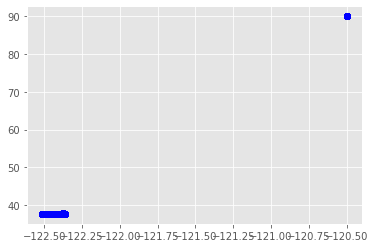

In [188]:
plt.plot(sf_data.X,sf_data.Y,'bo')

#### It appears there some oulier in the given longitude and latitude , below i went further to remove them so we can see the Plot properly

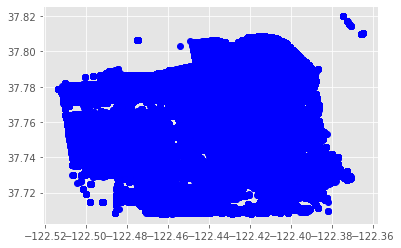

In [183]:
sf_data = sf_data[(sf_data.X != -120.5) & (sf_data.Y != 90)]
plt.plot(sf_data.X,sf_data.Y,'bo')

#### Here i randomly selected the categories that i found interesting, feel free to explore other categorizes as well

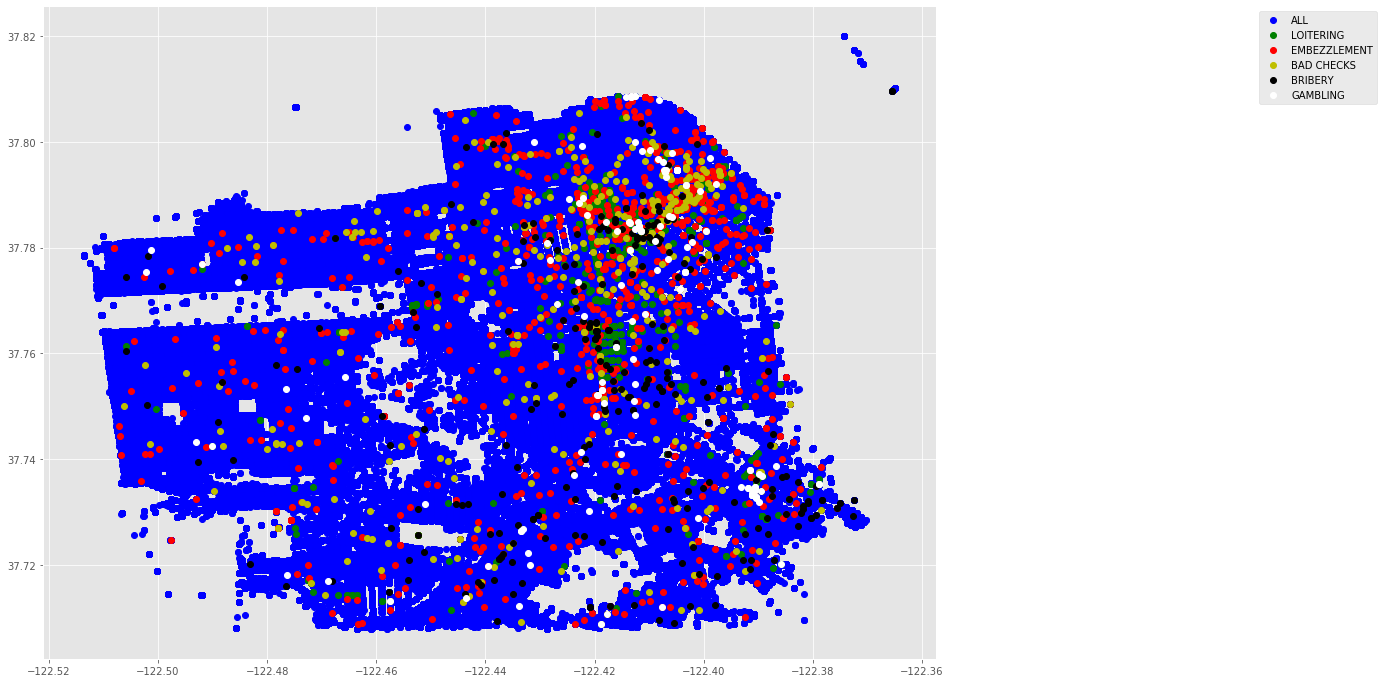

In [221]:
# get rid of bogus lat/long values
plt.figure(figsize=(16,12))
sf_data = sf_data[(sf_data.X != -120.5) & (sf_data.Y != 90)]
plt.plot(sf_data.X,sf_data.Y,'bo',label='ALL')
tmp_df = sf_data[sf_data.Category == 'LOITERING']
plt.plot(tmp_df.X,tmp_df.Y,'go',label='LOITERING')
tmp_df = sf_data[sf_data.Category == 'EMBEZZLEMENT']
plt.plot(tmp_df.X,tmp_df.Y,'ro',label='EMBEZZLEMENT')
tmp_df = sf_data[sf_data.Category == 'BAD CHECKS']
plt.plot(tmp_df.X,tmp_df.Y,'yo',label='BAD CHECKS')
tmp_df = sf_data[sf_data.Category == 'BRIBERY']
plt.plot(tmp_df.X,tmp_df.Y,'ko',label='BRIBERY')
tmp_df = sf_data[sf_data.Category == 'GAMBLING']
plt.plot(tmp_df.X,tmp_df.Y,'wo',label='GAMBLING')
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.5,1))

### Final Notes
We have looked at the San francisci crime insident data set and we have been able to answer the underlisted questions,
+ _What are the most commited crime incidents in Francisco?_
+ _How frequently does crimes occur with respect to time?_
+ _How frequently does crimes occur with respect to location?_

Feel free to Explore More on the data to see if you can derive nore insights. 